### 2.4.2 결정 함수

In [2]:
from IPython.display import display

import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline

import pandas as pd

import mglearn

from sklearn.model_selection import train_test_split

from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_circles

import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus']=False

if platform.system()=='Darwin':
    rc('font', family='AppleGothic')
elif platform.system() =='Windows':
    path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')

In [3]:
X, y = make_circles(noise=0.25, factor=0.5, random_state=1)

# 예제를 위해 클래스의 이름'blue'와 'red'로 바꿉니다.
y_named = np.array(['blue','red'])[y]

# 여러 개의 배열을 한꺼번에 train_test_split에 넣울 수 있습니다.
# 훈련 세트와 테스트 세트로 나뉘는 방식은 똑같습니다.
X_train, X_test, y_train_named, y_test_named, y_train, y_test = train_test_split(X,y_named,y,random_state=0)

#그래디언트 부스팅 모델을 만듭니다.
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train_named)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [4]:
print('X_Test.shape:', X_test.shape )
print('결정 함수 결과 행태:', gbrt.decision_function(X_test).shape)

X_Test.shape: (25, 2)
결정 함수 결과 행태: (25,)


In [9]:
gbrt.decision_function(X_train)

array([-2.69198006, -3.73723417, -4.00252861, -4.17231209, -4.17231209,
       -4.10687349, -6.13863529, -3.62599351, -3.62599351,  4.11001634,
       -3.45608201,  3.40782247, -2.22566979, -6.17578964, -5.17375355,
        4.13592629,  3.57353162,  4.28986668,  3.81509573,  2.4582176 ,
       -4.02374929, -3.50782825,  4.03602808, -3.53761762, -4.4636664 ,
       -4.35690087,  4.03171995,  4.22052974,  4.28986668, -5.03025403,
       -3.63716492, -2.54804249, -3.26462504,  4.11001634, -6.96441363,
        4.13592629,  2.4582176 , -4.20875267,  2.51949735, -4.17231209,
        2.73639149,  4.28986668, -6.96441363,  4.82986045,  4.28986668,
       -4.17231209, -4.02374929,  4.28986668,  2.73786872, -5.62446386,
        2.60378131, -2.09767851, -5.02205305,  4.28986668,  4.28986668,
       -4.13987078,  4.11001634, -3.45608201, -5.27754447, -2.90325601,
        4.13592629, -3.64636705,  2.96939851,  3.57353162,  3.57353162,
       -5.44429607, -3.20282228,  2.361909  , -3.48711761,  4.11

In [11]:
# 결정 함수 결과 중 앞 부분 일부를 확인합니다.
print('결정 함수:\n', gbrt.decision_function(X_test)[:6])

결정 함수:
 [ 4.13592629 -1.7016989  -3.95106099 -3.62599351  4.28986668  3.66166106]


In [12]:
print('임계치와 결정 함수 결과 비교:\n', gbrt.decision_function(X_test)>0)
print('예측:\n', gbrt.predict(X_test))

임계치와 결정 함수 결과 비교:
 [ True False False False  True  True False  True  True  True False  True
  True False  True False False False  True  True  True  True  True False
 False]
예측:
 ['red' 'blue' 'blue' 'blue' 'red' 'red' 'blue' 'red' 'red' 'red' 'blue'
 'red' 'red' 'blue' 'red' 'blue' 'blue' 'blue' 'red' 'red' 'red' 'red'
 'red' 'blue' 'blue']


In [14]:
# 불리언 값을 0과 1로 변환합니다.
greater_zero = (gbrt.decision_function(X_test) >0).astype(int)
# classes_에 인덱스로 사용합니다.
pred = gbrt.classes_[greater_zero]
# pred 와 gbrtpredict의 결과를 비교합니다.
print('pred는 예측 결과가 같다:', np.all(pred == gbrt.predict(X_test)))

pred는 예측 결과가 같다: True


In [18]:
decision_function = gbrt.decision_function(X_test)
print('결정 함수 최솟값: {:.2f} 최댓값: {:.2f}'.format(np.min(decision_function), np.max(decision_function)))

결정 함수 최솟값: -7.69 최댓값: 4.29


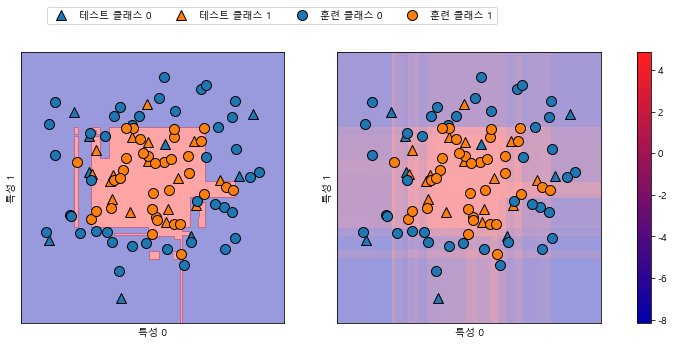

In [22]:
fig, axes = plt.subplots(1,2, figsize=(13,5))

mglearn.tools.plot_2d_separator(gbrt, X, ax=axes[0], alpha =.4,
                               fill = True, cm = mglearn.cm2)
scores_image = mglearn.tools.plot_2d_scores(gbrt, X, ax=axes[1], alpha=.4, cm=mglearn.ReBl)

for ax in axes :
    # 훈련 포인트와 테스트 포인트를 그리기
    mglearn.discrete_scatter(X_test[:, 0], X_test[:,1], y_test,
                            markers= '^', ax = ax)
    mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train,
                            markers='o', ax= ax)
    
    ax.set_xlabel('특성 0')
    ax.set_ylabel('특성 1')
    
cbar = plt.colorbar(scores_image, ax =axes.tolist())
cbar.set_alpha(1)
cbar.draw_all()
axes[0].legend(['테스트 클래스 0', '테스트 클래스 1', '훈련 클래스 0', '훈련 클래스 1'], ncol =4, loc=(.1,1.1))


### 2.4.2 예측 확률

In [23]:
print('확률 값의 형태:', gbrt.predict_proba(X_test).shape)

확률 값의 형태: (25, 2)


In [25]:
gbrt.predict_proba(X_test)

array([[1.57362600e-02, 9.84263740e-01],
       [8.45756491e-01, 1.54243509e-01],
       [9.81128693e-01, 1.88713075e-02],
       [9.74067751e-01, 2.59322495e-02],
       [1.35214179e-02, 9.86478582e-01],
       [2.50463685e-02, 9.74953631e-01],
       [9.99543275e-01, 4.56725227e-04],
       [1.61426459e-02, 9.83857354e-01],
       [2.48330011e-01, 7.51669989e-01],
       [3.20518856e-02, 9.67948114e-01],
       [9.98441742e-01, 1.55825797e-03],
       [1.35214179e-02, 9.86478582e-01],
       [1.98099196e-02, 9.80190080e-01],
       [7.68580268e-01, 2.31419732e-01],
       [2.50463685e-02, 9.74953631e-01],
       [9.84817488e-01, 1.51825121e-02],
       [7.73836115e-01, 2.26163885e-01],
       [9.80463918e-01, 1.95360817e-02],
       [1.73607853e-02, 9.82639215e-01],
       [1.61426459e-02, 9.83857354e-01],
       [1.61426459e-02, 9.83857354e-01],
       [3.41393690e-01, 6.58606310e-01],
       [6.30759354e-02, 9.36924065e-01],
       [9.34424780e-01, 6.55752202e-02],
       [8.661995

In [26]:
# predict_proba 결과 중 앞부분 일부를 확인합니다.
print('예측 확률:\n', gbrt.predict_proba(X_test[:6]))

예측 확률:
 [[0.01573626 0.98426374]
 [0.84575649 0.15424351]
 [0.98112869 0.01887131]
 [0.97406775 0.02593225]
 [0.01352142 0.98647858]
 [0.02504637 0.97495363]]


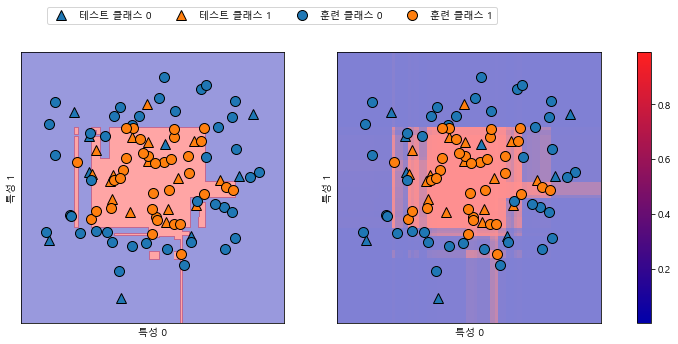

In [29]:
fig, axes = plt.subplots(1,2, figsize = (13,5))

mglearn.tools.plot_2d_separator(
    gbrt, X, ax=axes[0], alpha=.4, fill =True, cm = mglearn.cm2)
scores_image = mglearn.tools.plot_2d_scores(
    gbrt, X, ax=axes[1], alpha =.5, cm=mglearn.ReBl, function='predict_proba')
for ax in axes:
    # 훈련 포인트와 테스트 포인트를 그리기
    mglearn.discrete_scatter(X_test[:,0], X_test[:,1], y_test,
                            markers= '^', ax = ax)
    mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train,
                            markers= 'o', ax = ax)
    ax.set_xlabel('특성 0')
    ax.set_ylabel('특성 1')
# colorbar를 감추지 않습니다.
cbar = plt.colorbar(scores_image, ax= axes.tolist())
cbar.set_alpha(1)
cbar.draw_all()
axes[0].legend(['테스트 클래스 0', '테스트 클래스 1', '훈련 클래스 0', '훈련 클래스 1'], ncol=4, loc=(.1,1.1))


### 2.4.3 다중 분류에서의 불확실성

In [30]:
from sklearn.datasets import load_iris

In [31]:
iris = load_iris()

In [32]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state = 42)

In [39]:
gbrt= GradientBoostingClassifier(learning_rate = 0.01, random_state = 0)
gbrt.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.01, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [40]:
print('결정 함수의 결과 형태:', gbrt.decision_function(X_test).shape)
print('결정 함수의 결과:\n', gbrt.decision_function(X_test)[:6, :])

결정 함수의 결과 형태: (38, 3)
결정 함수의 결과:
 [[-1.9957153   0.04758118 -1.92721297]
 [ 0.0614655  -1.90755689 -1.92793177]
 [-1.99058105 -1.87637856  0.09686741]
 [-1.9957153   0.04758118 -1.92721297]
 [-1.99730166 -0.13469231 -1.20341532]
 [ 0.0614655  -1.90755689 -1.92793177]]


In [41]:
print('가장 큰 결정 함수의 인덱스:\n',
     np.argmax(gbrt.decision_function(X_test), axis=1))
print('예측:\n', gbrt.predict(X_test))

가장 큰 결정 함수의 인덱스:
 [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
예측:
 [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]


In [42]:
# predict_proba 결과 중 앞부분 일부를 확인합니다.
print('예측 확률 :\n', gbrt.predict_proba(X_test)[:6])
# 행 방향으로 확률을 더하면 1이 된다.
print('합:', gbrt.predict_proba(X_test)[:6].sum(axis=1))

예측 확률 :
 [[0.10217734 0.78840063 0.10942203]
 [0.7834712  0.1093673  0.1071615 ]
 [0.09818079 0.11005862 0.79176059]
 [0.10217734 0.78840063 0.10942203]
 [0.10360014 0.66723882 0.22916105]
 [0.7834712  0.1093673  0.1071615 ]]
합: [1. 1. 1. 1. 1. 1.]


In [43]:
print('가장 큰 예측 확률의 인덱스:\n',
     np.argmax(gbrt.predict_proba(X_test), axis =1))
print('예측:\n', gbrt.predict(X_test))

가장 큰 예측 확률의 인덱스:
 [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
예측:
 [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]


In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

In [56]:
logreg = LogisticRegression()
# iris 데이터셋의 타깃을 클래스 이름으로 나타내기
named_target = iris.target_names[y_train]
logreg.fit(X_train, named_target)
print('훈련 데이터에 있는 클래스 종류:', logreg.classes_)
print('예측:', logreg.fit(X_train, named_target))

훈련 데이터에 있는 클래스 종류: ['setosa' 'versicolor' 'virginica']
예측: LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)


C:\Users\multicampus\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\multicampus\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\multicampus\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\multicampus\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [69]:
argmax_dec_func = np.argmax(logreg.decision_function(X_test), axis= 1)
print('가장 큰 결정 함수의 인덱스:', argmax_dec_func[:10])
print('인덱스를 classes_에 연결:', logreg.classes_[argmax_dec_func][:10])

가장 큰 결정 함수의 인덱스: [1 0 2 1 1 0 1 2 1 1]
인덱스를 classes_에 연결: ['versicolor' 'setosa' 'virginica' 'versicolor' 'versicolor' 'setosa'
 'versicolor' 'virginica' 'versicolor' 'versicolor']
